In [5]:
import ephem
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
DATAPATH = "Dataset/"

In [6]:
dsi = pd.read_csv(DATAPATH+"decayed_satellites_info.csv")
sspc = pd.read_csv(DATAPATH+"sat_statistics_per_country.csv")
sioi = pd.read_csv(DATAPATH+"satellites_in_orbit_info.csv")

In [7]:
sspc.head()

,COUNTRY,SPADOC_CD,ORBITAL_TBA,ORBITAL_PAYLOAD_COUNT,ORBITAL_ROCKET_BODY_COUNT,ORBITAL_DEBRIS_COUNT,ORBITAL_TOTAL_COUNT,DECAYED_PAYLOAD_COUNT,DECAYED_ROCKET_BODY_COUNT,DECAYED_DEBRIS_COUNT,DECAYED_TOTAL_COUNT,COUNTRY_TOTAL
0,ARAB SATELLITE COMMUNICATIONS ORGANIZATION,AB,0,13,0,0,13,1,0,0,1,14
1,ASIASAT CORP,AC,0,8,0,0,8,0,0,0,0,8
2,ALGERIA,ALG,0,5,0,0,5,0,0,0,0,5
3,ARGENTINA,ARGN,0,17,0,0,17,2,0,0,2,19
4,AUSTRIA,ASRA,0,3,0,0,3,0,0,0,0,3


In [8]:
sspc_dec = sspc[["COUNTRY", "DECAYED_TOTAL_COUNT"]].set_index("COUNTRY")
sspc= sspc[["COUNTRY", "ORBITAL_TOTAL_COUNT"]].set_index("COUNTRY")


### Bias
Russia is missing in the data

In [9]:
sspc_dec.loc["ALL"]

DECAYED_TOTAL_COUNT    24212
Name: ALL, dtype: int64

In [10]:
sspc= sspc.drop("ALL")
sspc_dec= sspc_dec.drop("ALL")
#sspc = sspc.drop(sspc[["ORBITAL_TOTAL_COUNT"] <= 0])

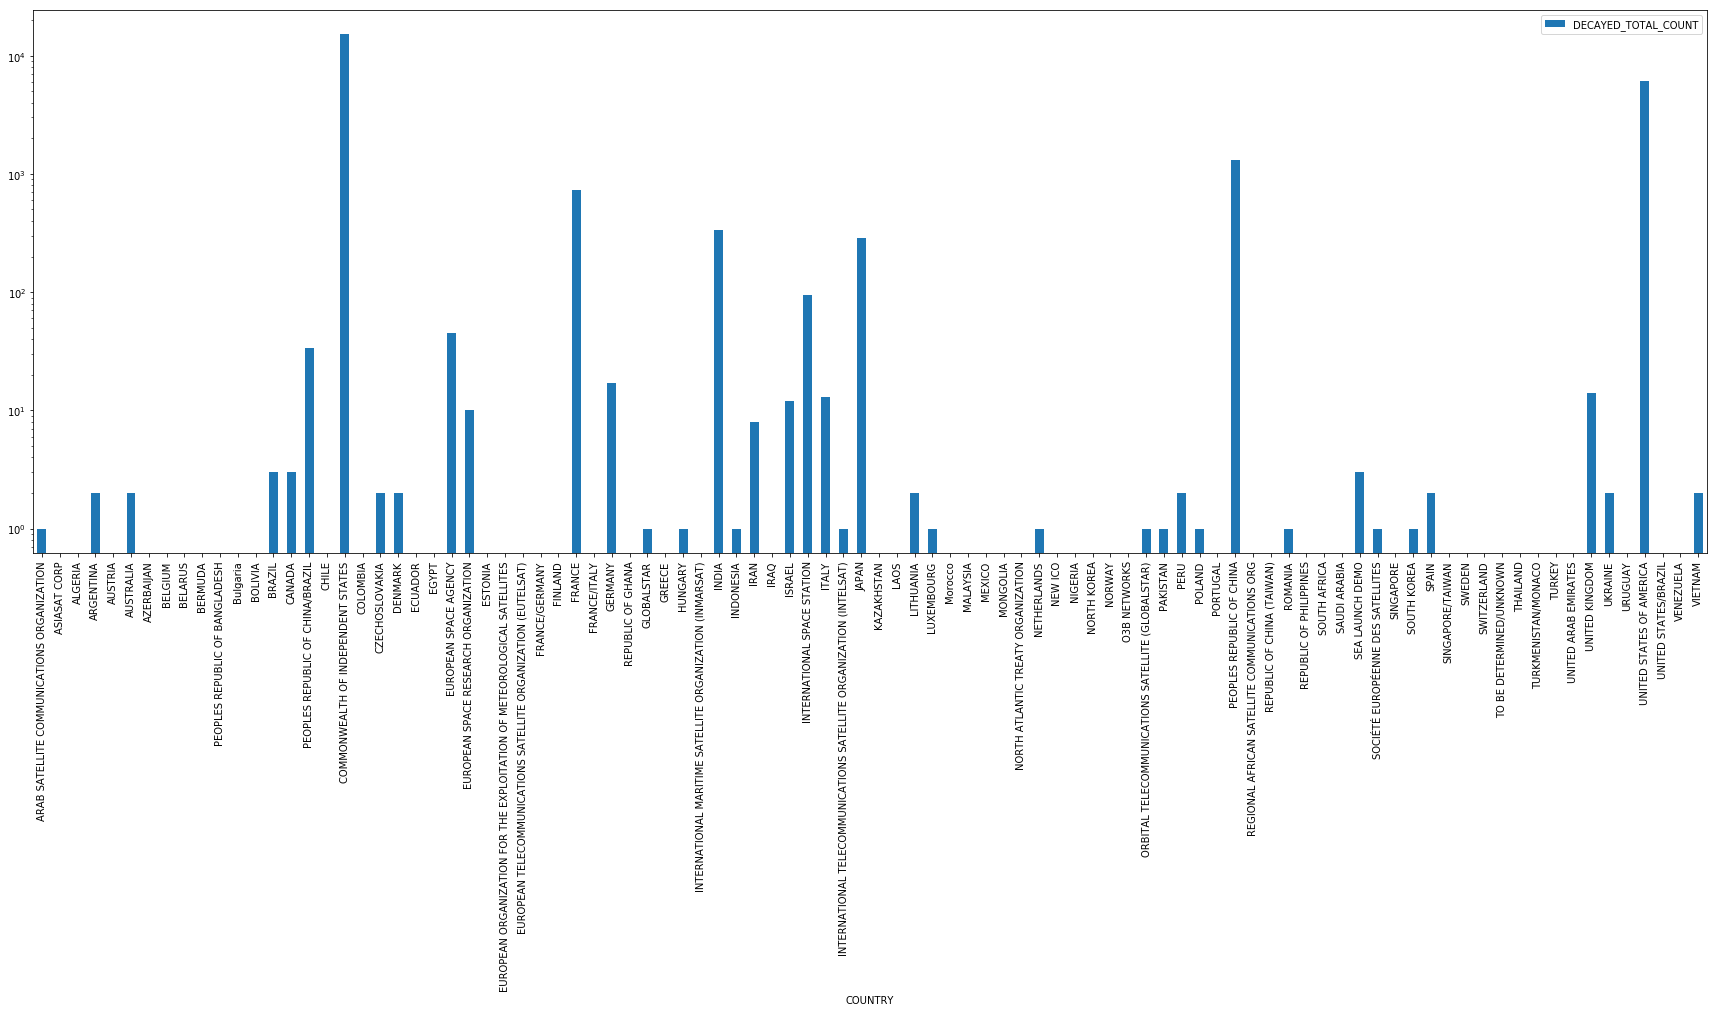

In [11]:
sspc_dec.plot(kind='bar', figsize = (30, 10), logy=True)
plt.show()

In [12]:
sspc_dec = sspc_dec[sspc_dec["DECAYED_TOTAL_COUNT"] > 0]
sspc_dec.head()

,DECAYED_TOTAL_COUNT
COUNTRY,
ARAB SATELLITE COMMUNICATIONS ORGANIZATION,1
ARGENTINA,2
AUSTRALIA,2
BRAZIL,3
CANADA,3


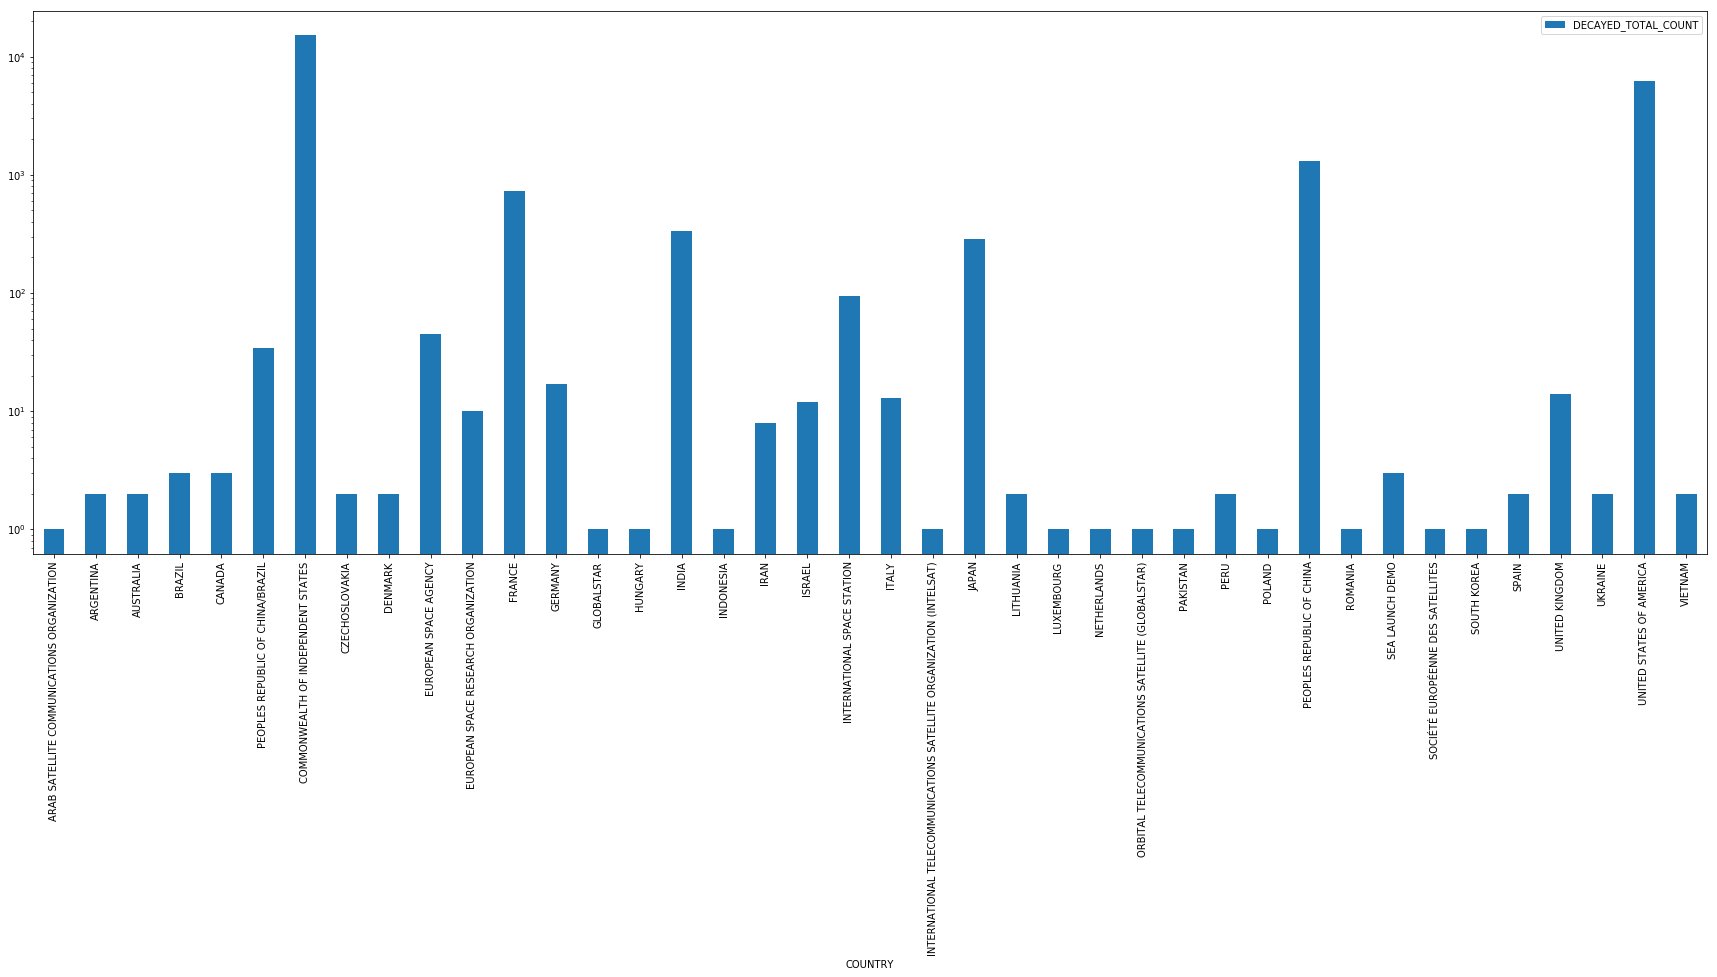

In [13]:
sspc_dec.plot(kind='bar', figsize = (30,10), logy=True)
plt.show()

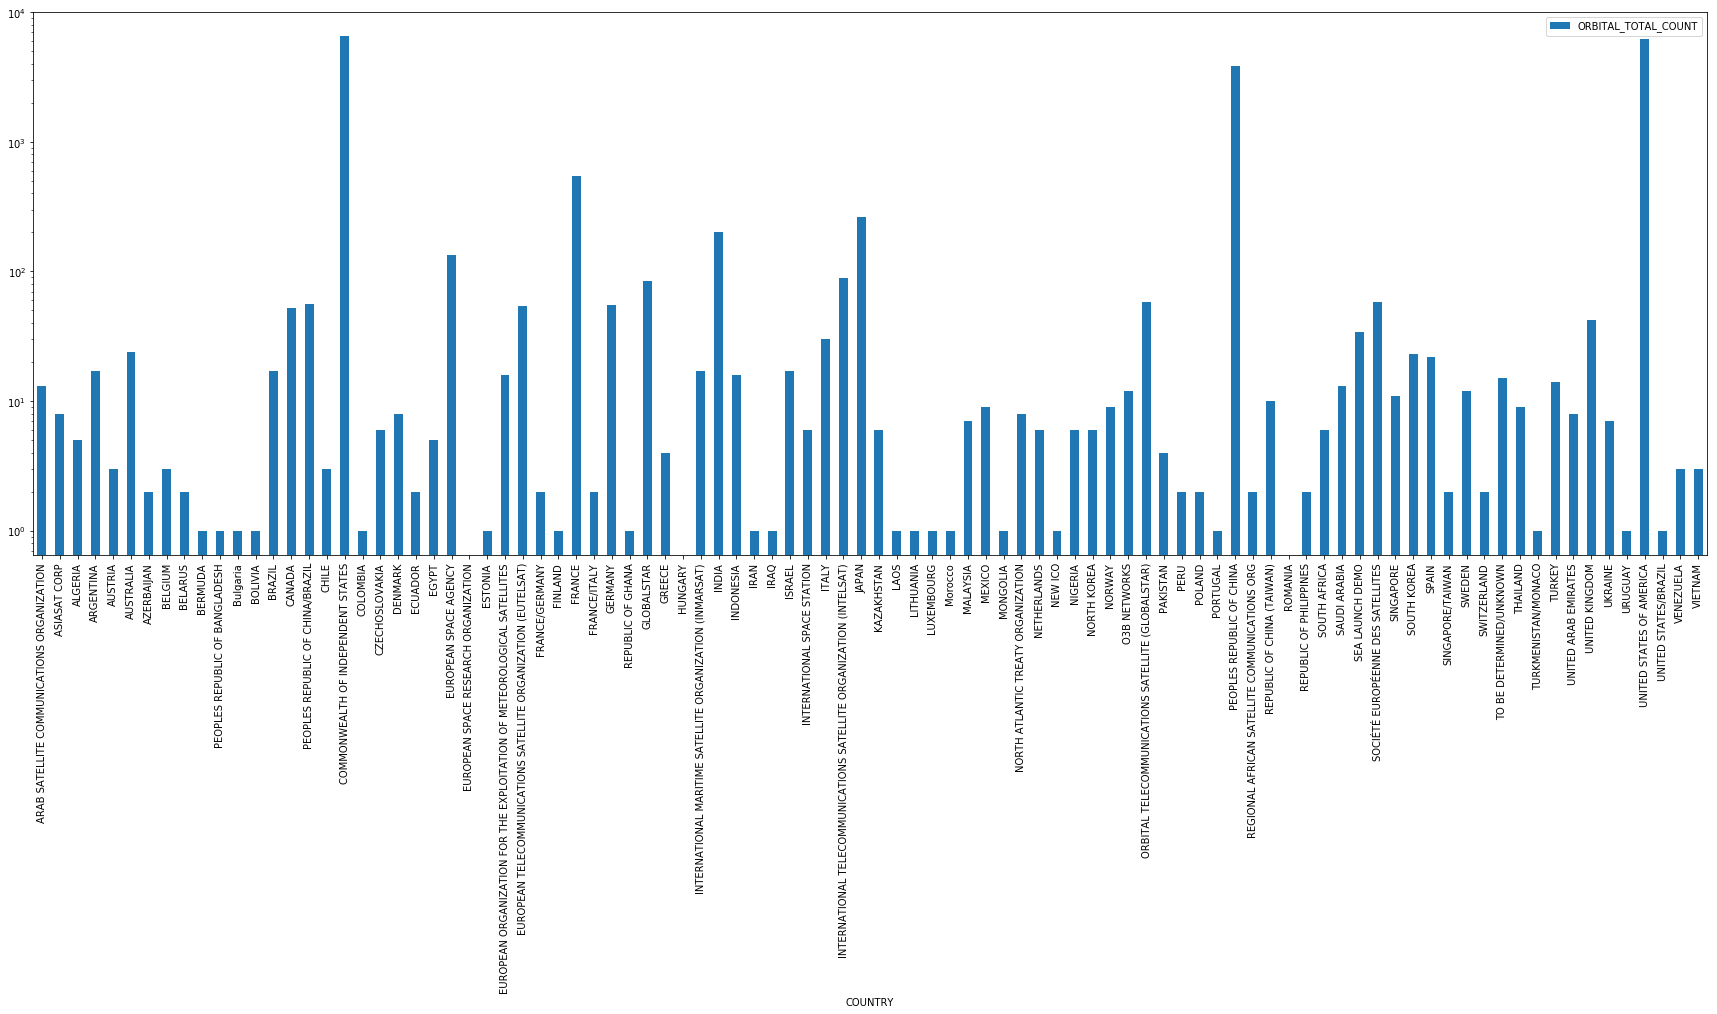

In [14]:
sspc.plot(kind='bar', figsize = (30, 10), logy=True)
plt.show()

In [15]:
dsi.shape

(24212, 13)

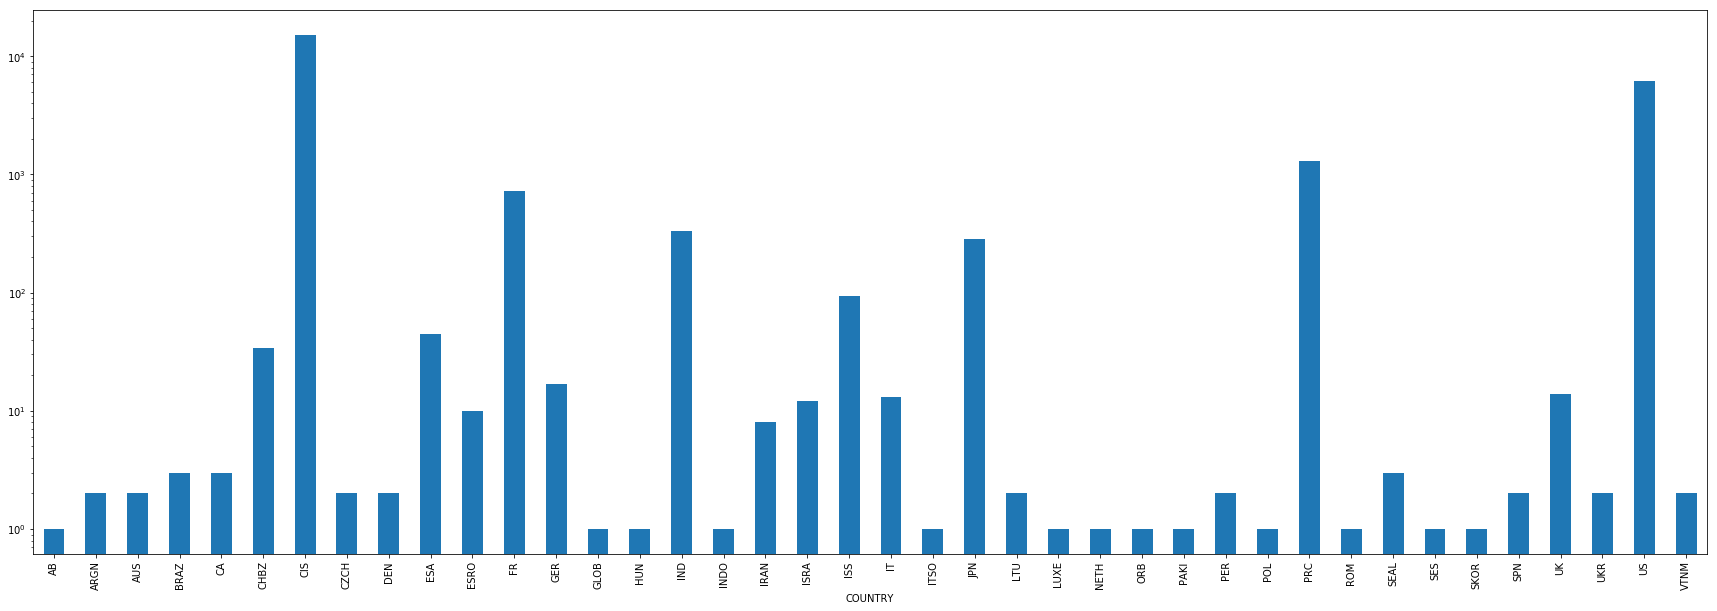

In [16]:
dsi.groupby("COUNTRY").size().plot(kind='bar', figsize = (30, 10), logy=True)
plt.show()

In [17]:
sioi.head()

,OBJECT_ID,OBJECT_NAME,NORAD_CAT_ID,COUNTRY,PERIOD,INCLINATION,APOGEE,PERIGEE,RCS_SIZE,RCSVALUE,LAUNCH,COMMENT
0,2017-075D,CZ-2C R/B,43031,PRC,95.19,35.21,599.0,457.0,NaN,0,2017-11-24,NaN
1,2017-075C,YAOGAN-30 F,43030,PRC,96.62,35.00,604.0,590.0,NaN,0,2017-11-24,NaN
2,2017-075B,YAOGAN-30 E,43029,PRC,96.62,35.00,604.0,590.0,NaN,0,2017-11-24,NaN
3,2017-075A,YAOGAN-30 D,43028,PRC,96.62,35.00,603.0,590.0,NaN,0,2017-11-24,NaN
4,1998-067NL,OSIRIS-3U,43027,US,92.59,51.64,405.0,398.0,NaN,0,1998-11-20,NaN


In [24]:
s = "YAOGAN-30 F"
sioi[sioi.OBJECT_NAME == s].PERIOD.values[0]

96.620000000000005

In [207]:
sioi["LAUNCH"]= pd.to_datetime(sioi["LAUNCH"]).apply(lambda x: x.strftime('%Y'))

In [208]:
sioi.LAUNCH

0        2017
1        2017
2        2017
3        2017
4        1998
5        1998
6        2017
7        2017
8        2017
9        2017
10       1998
11       1998
12       1998
13       2017
14       2017
15       2017
16       2017
17       2017
18       2017
19       2017
20       2017
21       2017
22       2017
23       2017
24       2017
25       2017
26       2017
27       2017
28       1970
29       1974
         ... 
18789    1961
18790    1961
18791    1961
18792    1961
18793    1961
18794    1961
18795    1960
18796    1959
18797    1959
18798    1961
18799    1961
18800    1961
18801    1961
18802    1960
18803    1960
18804    1960
18805    1960
18806    1960
18807    1960
18808    1960
18809    1960
18810    1960
18811    1960
18812    1960
18813    1959
18814    1959
18815    1958
18816    1959
18817    1959
18818    1958
Name: LAUNCH, Length: 18819, dtype: object

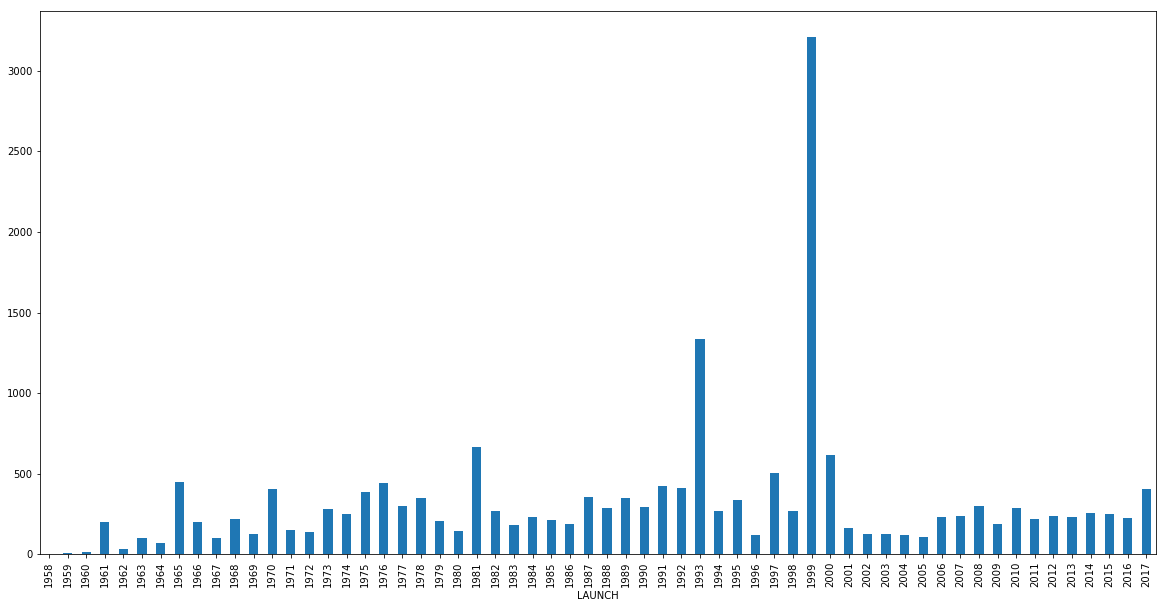

In [209]:
sioi.groupby("LAUNCH").size().plot(kind="bar", figsize=(20,10))
plt.show()

In [211]:
sioi.shape

(18819, 12)

In [4]:
dict_= {"23": (23,12),"12": (1,2)}
a,b = dict_["23"]
b
s = "abcdefghij"
s[2:5]

'cde'

array([   0,   10,   20,   30,   40,   50,   60,   70,   80,   90,  100,
        110,  120,  130,  140,  150,  160,  170,  180,  190,  200,  210,
        220,  230,  240,  250,  260,  270,  280,  290,  300,  310,  320,
        330,  340,  350,  360,  370,  380,  390,  400,  410,  420,  430,
        440,  450,  460,  470,  480,  490,  500,  510,  520,  530,  540,
        550,  560,  570,  580,  590,  600,  610,  620,  630,  640,  650,
        660,  670,  680,  690,  700,  710,  720,  730,  740,  750,  760,
        770,  780,  790,  800,  810,  820,  830,  840,  850,  860,  870,
        880,  890,  900,  910,  920,  930,  940,  950,  960,  970,  980,
        990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090,
       1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200,
       1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310,
       1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420,
       1430, 1440, 1450, 1460, 1470, 1480, 1490, 15

In [42]:
from datetime import timedelta
now = datetime.datetime.now()
print(now)
now + timedelta(seconds= 30)
d = datetime.datetime(2016, 12, 1)
d= d + timedelta(hours = 10)
d

2018-01-11 17:20:50.055908


datetime.datetime(2016, 12, 1, 10, 0)

In [46]:
def satellite_orbit(name):
    orbit_point = []
    line_1, line_2 = dict_[name]
    period = int(sioi[sioi.OBJECT_NAME == s].PERIOD.values[0])
    delta_t = int(period*60/nb_point)
    delta_t = timedelta(seconds = delta_t)
    time = datetime.datetime(2017,10,12)
    l1, l2 = dict_tle[name]
    temp = ephem.readtle(name, l1, l2)
    for i in range(0,200):
        time = time + delta_t
        temp.compute(time)
        try:
            lat = temp.sublat*180/pi
            long = temp.sublong*180/pi
            orbit_point.append((lat,long))
        except:
            print("ERROR")
    return orbit_point
        


In [47]:
from multiprocessing import Pool

p= Pool()

p.map(satellite_orbit, list(dict_tle.keys()))

NameError: name 'dict_tle' is not defined

In [31]:
dict_ = {}
nb_point = 200
time = datetime.datetime.time
for name in dict_.keys():
    
    line_1, line_2 = dict_[name]
    period = int(sioi[sioi.OBJECT_NAME == s].PERIOD.values[0])
    delta_t = int(period*60/nb_point)
    delta_ts = np.array(range(0,200))*delta_t
    
    delta_ t = timedelta(seconds = delta_t)
    timestamp = np.array(range(0,200)*delta_t)
    
    

SyntaxError: invalid syntax (<ipython-input-31-fc06314efbca>, line 8)